In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import warnings
from datetime import datetime
# ignore warnings
warnings.filterwarnings('ignore')
df1= pd.read_csv("Groceries_TS_And_ARM_dataset.csv")
df1

,Member_number,Date,itemDescription
0,1808,21/07/2015,tropical fruit
1,2552,05/01/2015,whole milk
2,2300,19/09/2015,pip fruit
3,1187,12/12/2015,other vegetables
4,3037,01/02/2015,whole milk
...,...,...,...
38760,4471,08/10/2014,sliced cheese
38761,2022,23/02/2014,candy
38762,1097,16/04/2014,cake bar
38763,1510,03/12/2014,fruit/vegetable juice


In [2]:
df1['Date'] = pd.to_datetime(df1['Date'])
df1['year'] = df1.Date.dt.year
df1['month'] = df1.Date.dt.month
df1['day'] = df1.Date.dt.day
df1['day_of_week'] = df1.Date.dt.day_name()
df1

,Member_number,Date,itemDescription,year,month,day,day_of_week
0,1808,2015-07-21,tropical fruit,2015,7,21,Tuesday
1,2552,2015-05-01,whole milk,2015,5,1,Friday
2,2300,2015-09-19,pip fruit,2015,9,19,Saturday
3,1187,2015-12-12,other vegetables,2015,12,12,Saturday
4,3037,2015-01-02,whole milk,2015,1,2,Friday
...,...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10,Sunday
38761,2022,2014-02-23,candy,2014,2,23,Sunday
38762,1097,2014-04-16,cake bar,2014,4,16,Wednesday
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12,Wednesday


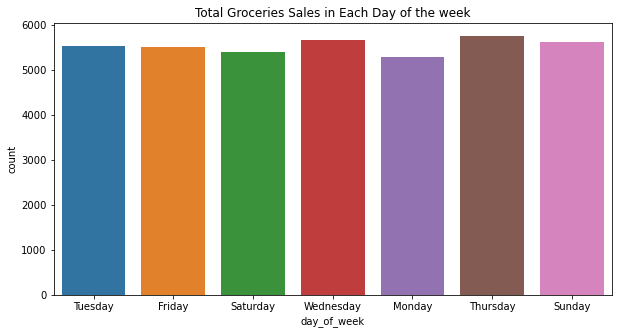

In [3]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x=df1["day_of_week"]).set_title("Total Groceries Sales in Each Day of the week")
plt.show()

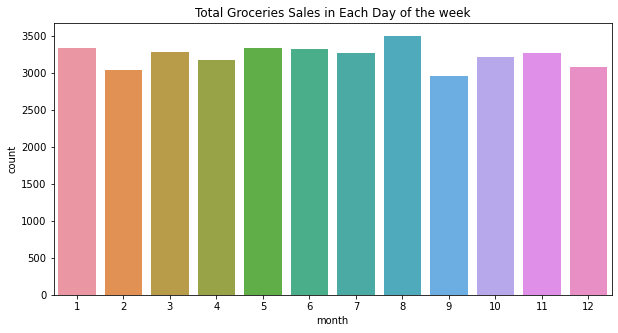

In [4]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x=df1["month"]).set_title("Total Groceries Sales in Each Day of the week")
plt.show()

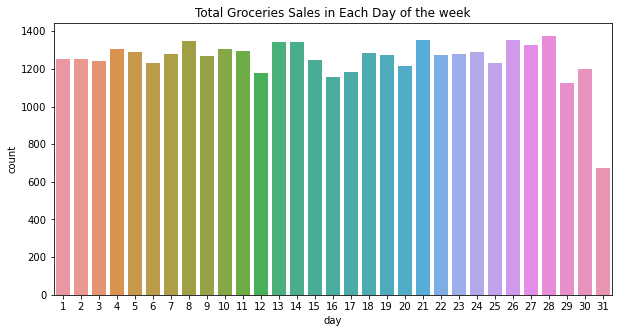

In [5]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x=df1["day"]).set_title("Total Groceries Sales in Each Day of the week")
plt.show()


In [6]:
df2=pd.DataFrame(df1.groupby('Date')['itemDescription'].nunique().index)
df2['member_count']=df1.groupby('Date')['Member_number'].nunique().values
df2['item_count']=df1.groupby('Date')['itemDescription'].nunique().values
df2['items']=df1.groupby('Date')['itemDescription'].unique().values
df2.set_index('Date',inplace= True)    
df2

,member_count,item_count,items
Date,,,
2014-01-01,21,30,"[cleaner, sausage, tropical fruit, whole milk,..."
2014-01-02,29,45,"[other vegetables, pip fruit, frankfurter, sug..."
2014-01-03,24,36,"[sausage, meat, sugar, bottled beer, whole mil..."
2014-01-04,28,33,"[frankfurter, pastry, salty snack, bottled bee..."
2014-01-05,20,31,"[sausage, root vegetables, whipped/sour cream,..."
...,...,...,...
2015-12-26,15,26,"[bottled water, herbs, sausage, pip fruit, chi..."
2015-12-27,21,43,"[chicken, frankfurter, other vegetables, tropi..."
2015-12-28,19,37,"[onions, root vegetables, citrus fruit, rolls/..."


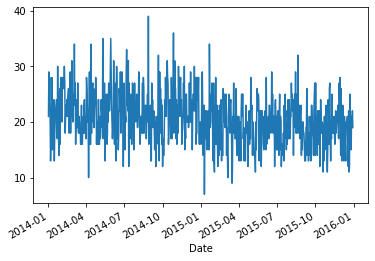

In [7]:
df2.member_count.plot()
plt.rcParams['figure.figsize'] = (5,10)
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14
plt.show()

In [8]:
df2.shape

(728, 3)

In [9]:
df3=df2["items"].tolist()
df3

[array(['cleaner', 'sausage', 'tropical fruit', 'whole milk',
        'citrus fruit', 'onions', 'other vegetables', 'berries',
        'hamburger meat', 'bottled water', 'butter', 'yogurt', 'waffles',
        'soda', 'sliced cheese', 'curd', 'specialty chocolate',
        'shopping bags', 'flower (seeds)', 'coffee', 'whipped/sour cream',
        'frozen potato products', 'candles', 'bottled beer',
        'Instant food products', 'frozen vegetables', 'brown bread',
        'domestic eggs', 'dishes', 'chocolate'], dtype=object),
 array(['other vegetables', 'pip fruit', 'frankfurter', 'sugar',
        'frozen vegetables', 'beef', 'waffles', 'meat', 'root vegetables',
        'pastry', 'butter', 'brown bread', 'ice cream', 'soda',
        'rolls/buns', 'chicken', 'citrus fruit', 'white bread',
        'frozen fish', 'sparkling wine', 'cream cheese ', 'whole milk',
        'tropical fruit', 'fruit/vegetable juice', 'yogurt',
        'condensed milk', 'curd', 'soft cheese', 'canned beer', '

In [10]:
from apyori import apriori
rules = apriori(df3, min_support = 0.00030, min_confidence = 0.01, min_lift = 3, min_length = 2,max_length=2)
df4 = list(rules)
df4

[RelationRecord(items=frozenset({'Instant food products', 'baby cosmetics'}), support=0.0027472527472527475, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'baby cosmetics'}), confidence=0.03508771929824562, lift=8.514619883040936), OrderedStatistic(items_base=frozenset({'baby cosmetics'}), items_add=frozenset({'Instant food products'}), confidence=0.6666666666666667, lift=8.514619883040936)]),
 RelationRecord(items=frozenset({'bags', 'Instant food products'}), support=0.0013736263736263737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'Instant food products'}), items_add=frozenset({'bags'}), confidence=0.01754385964912281, lift=3.192982456140351), OrderedStatistic(items_base=frozenset({'bags'}), items_add=frozenset({'Instant food products'}), confidence=0.25, lift=3.192982456140351)]),
 RelationRecord(items=frozenset({'Instant food products', 'liqueur'}), support=0.004120879120879121, ordered_statistics=[Ordered

In [11]:
def inspect(a):
    lhs         = [tuple(result[2][0][0])[0] for result in a]
    rhs         = [tuple(result[2][0][1])[0] for result in a]
    supports    = [result[1] for result in a]
    confidences = [result[2][0][2] for result in a]
    lifts       = [result[2][0][3] for result in a]
    return list(zip(lhs, rhs, supports, confidences, lifts))
output_DataFrame = pd.DataFrame(inspect(df4), columns = ['item1', 'item2', 'Support', 'Confidence', 'Lift'])
output_DataFrame

,item1,item2,Support,Confidence,Lift
0,Instant food products,baby cosmetics,0.002747,0.035088,8.514620
1,Instant food products,bags,0.001374,0.017544,3.192982
2,Instant food products,liqueur,0.004121,0.052632,4.257310
3,abrasive cleaner,cleaner,0.005495,0.181818,4.564263
4,artif. sweetener,baby cosmetics,0.001374,0.035714,8.666667
...,...,...,...,...,...
237,softener,toilet cleaner,0.001374,0.024390,3.551220
238,specialty vegetables,tea,0.002747,0.181818,5.090909
239,spices,toilet cleaner,0.002747,0.051282,7.466667
240,syrup,whisky,0.001374,0.047619,4.333333


In [12]:
output_DataFrame.nlargest(n = 10, columns = 'Lift')

,item1,item2,Support,Confidence,Lift
169,liqueur,preservation products,0.001374,0.111111,80.888889
160,kitchen utensil,prosecco,0.001374,1.000000,38.315789
157,kitchen utensil,male cosmetics,0.001374,1.000000,20.800000
203,preservation products,spices,0.001374,1.000000,18.666667
21,bags,frozen fruits,0.001374,0.250000,16.545455
201,preservation products,soups,0.001374,1.000000,15.826087
118,frozen chicken,organic products,0.001374,0.200000,14.560000
92,decalcifier,salad dressing,0.001374,0.111111,13.481481
113,frozen chicken,frozen fruits,0.001374,0.200000,13.236364
81,cream,frozen chicken,0.001374,0.083333,12.133333


In [ ]:
From the Association Rules,we pair liqueur and preservation products to increase the sales.